## Ciência de Dados - Atividade 2
### Atividade prática de exploração e análise de base de dados
### Base de dados 'Titanic'
---
**Docente:** Roseli Aparecida Romero  
**Discente:** Thiago Rafael Mariotti Claudio - 15611674  
**Data 15/02/2024**

# Exploração inicial e limpeza

Antes mesmo de formular quaisquer hipoteses, precisamos abrir a base e realizar uma exploração inicial, fazendo uma limpeza ou busca por possíveis erros, caso necessário.  
Para isso importaremos as ferramentas necessárias, nesse caso **pandas** e **numpy** para manipulação de _datasets_ e manipulação de dados númericos, respectivamente.

In [1]:
import pandas as pd
import numpy as np

Vamos utilizar o arquivo 'test.csv', pois se trata de um arquivo destinado à teste de modelos de aprendizado de máquina, e portanto possui maior volume de dados.

In [2]:
df = pd.read_csv('Titanic/train.csv', delimiter=',')

display(df)

print("\n\nLabel e tipagem de todas as colunas da base")
df.dtypes

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]



Label e tipagem de todas as colunas da base


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Vamos procurar por valores desconhecidos na base de dados.

In [3]:
print(f"Existem {df.isna().sum().sum()} valores desconhecidos no DataFrame, em um total {len(df)} de linhas.")

Existem 866 valores desconhecidos no DataFrame, em um total 891 de linhas.


O _dataset_ apresenta uma grande quantidade valores desconhecidos, e não é possível usar a função **dropna()** visto que varias linhas seriam removidas, afetando os resultados do estudo.
Podemos aplicar algumas técnicas para substituir esses valores, em detrimento à acurácia do estudo.
Primeiramente vamos verificar quais atributos apresentam esses valores.

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observamos 3 colunas com valores desconhecidos:

- __Age:__ (177/891)*100 = 19% _NaN_
- __Cabin:__ (687/891)*100 = 77% _NaN_
- __Embarked:__ (2/891)*100 = 0,22% _NaN_

## Lidando com valores desconhecidos

Podemos gerar uma matriz de correlação dos dados atuais afim de analisar quais técnicas de imputação fazem mais sentido para cada qual.

<Axes: >

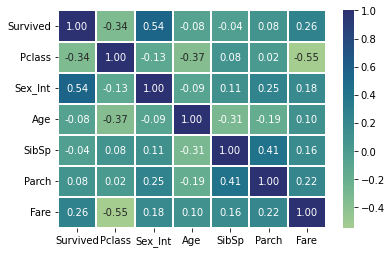

In [5]:
import seaborn as sns

df['Sex_Int'] = df['Sex'].replace( {'male':0 , 'female':1})
df_corr = df[['Survived','Pclass','Sex_Int','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(df_corr, annot = True, linewidths=2, fmt = '0.2f', cmap = 'crest')

Uma das hipoteses para essa base de dados é a correlação de **sobrevivência** e **idade**, o que poderia nos dar algum indicativo ou apresentar alguma narrativa referente à preferencia por embarque de crianças nos botes salva-vidas por exemplo.  
É necessário, no entanto, fazer algumas correções na base de dados, em decorrência a presença de valores desconhecidos para o atributo __Idade__. Como observado acima, o _dataset_ apresenta um grande volume de valores __nulos__.

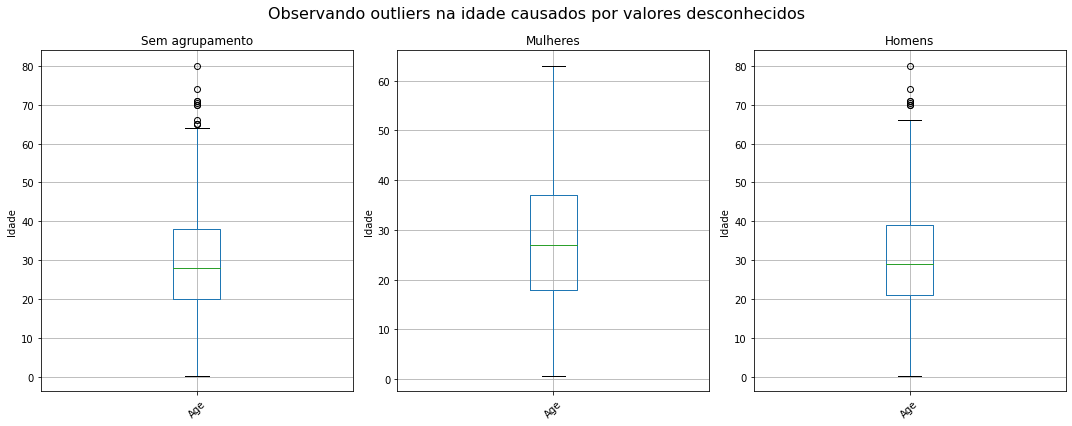

In [6]:
import matplotlib.pyplot as plt

df_f = df.copy()
df_m = df.copy()

df_f = df_f[df_f['Sex'] == 'female']
df_m = df_m[df_m['Sex'] == 'male']

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
df.boxplot(column='Age')
plt.title(f'Sem agrupamento')
plt.ylabel('Idade')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df_f.boxplot(column='Age')
plt.title(f'Mulheres')
plt.ylabel('Idade')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df_m.boxplot(column='Age')
plt.title(f'Homens')
plt.ylabel('Idade')
plt.xticks(rotation=45)

plt.suptitle('Observando outliers na idade causados por valores desconhecidos', fontsize=16)
plt.tight_layout()
plt.show()

Podemos aplicar medidas de tendência para substituir os valores, por exemplo, substituindo valores desconhecidos pela _moda_ ou _mediana_, mas isso pode gerar resultados enviesados ou sem acuracia, visto que, na análise gráfica acima, o atributo __idade__ apresenta um grande volume de _outliers_.

Uma boa maneira de realizar essa substituição de valores desconhecidos, dentro de uma métrica mais cabível seria __agrupar os individuos pelo titulação__.

Sabemos que:

- o título __Master__ é atribuido a homens jovens (exemplo: __Master.__ Gosta Leonard Palsson, de 2 anos).
- o título __Mr__ é atribuido a homens adultos, __independente__ da situação conjugal.
- o título __Miss__, semelhante a __Master__ é atribuido a mulheres jovens, embora possa ser usado de maneira intercambiável com __Ms__.
- o título __Mrs__ indica uma mulher já casada, o que abrange um grande intervalo de idades, visto os padrões sociais da epoca.
- o título __Ms__ é atribuido a mulheres cuja situação conjugal é desconhecida.

Dessa forma podemos agrupar esses individuos e utilizar técncias de análise para atribuir suas idades.

In [7]:
import re

df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
display(df)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Sex_Int Title  
0        0         A/5 21171   7.2500   NaN        S        0    Mr  
1        0          PC 17599  71.2833   C85        C        1   Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S        1  Miss  
3        0            113803  53.1000  C123        S        1   Mrs  
4        0            373450   8.0500   NaN        S        0    Mr  
..     ...               ...      ...   ...      ...      ...   ...  
886      0            211536  13.0000   NaN        S        0   Rev  
887      0            112053  30.0000   B42        S        1  Miss  
888      2        W./C. 6607  23.4500   NaN        S        1  Miss  
889      0            111369  30.0000  C148        C        0    Mr  
890      0            370376   7.7500   NaN        Q        0    Mr  

[891 rows x 14 columns]

In [8]:
df_idade_imputada = df.copy()
for title, age in df.groupby('Title')['Age'].median().items():
    df_idade_imputada.loc[(df_idade_imputada['Age'].isnull()) & (df_idade_imputada['Title'] == title), 'Age'] = age

Vamos verificar possíveis _outliers_ após a imputação da idade baseada no titulo.

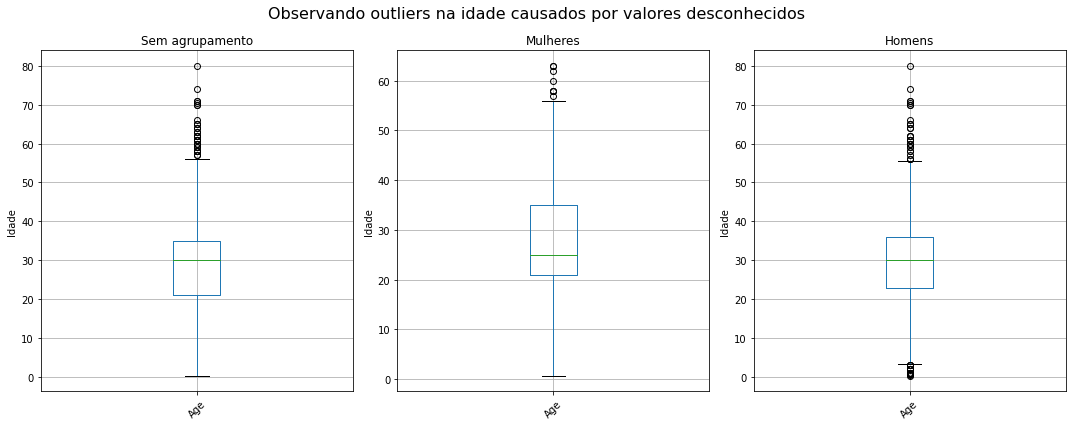

In [9]:
df_f_idade_imputada = df_idade_imputada.copy()
df_m_idade_imputada = df_idade_imputada.copy()

df_f_idade_imputada = df_f_idade_imputada[df_f_idade_imputada['Sex'] == 'female']
df_m_idade_imputada = df_m_idade_imputada[df_m_idade_imputada['Sex'] == 'male']

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
df_idade_imputada.boxplot(column='Age')
plt.title(f'Sem agrupamento')
plt.ylabel('Idade')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df_f_idade_imputada.boxplot(column='Age')
plt.title(f'Mulheres')
plt.ylabel('Idade')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df_m_idade_imputada.boxplot(column='Age')
plt.title(f'Homens')
plt.ylabel('Idade')
plt.xticks(rotation=45)

plt.suptitle('Observando outliers na idade causados por valores desconhecidos', fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
display(df['Age'].describe())
display(df_idade_imputada['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count    891.000000
mean      29.390202
std       13.265322
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Describe count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Kurtose 0.17827415364210353
Skewness 0.38910778230082704


<Axes: xlabel='Age', ylabel='Count'>

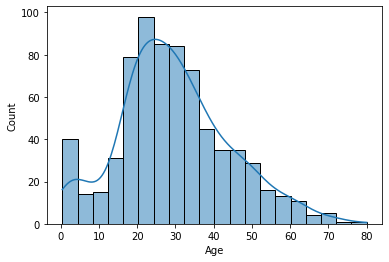

In [11]:
print("Describe",df['Age'].describe())
print("Kurtose",df['Age'].kurt())
print("Skewness",df['Age'].skew())
sns.histplot(df,x='Age',kde=True)

Describe count    891.000000
mean      29.390202
std       13.265322
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
Kurtose 0.7771874465521598
Skewness 0.43653382992894507


<Axes: xlabel='Age', ylabel='Count'>

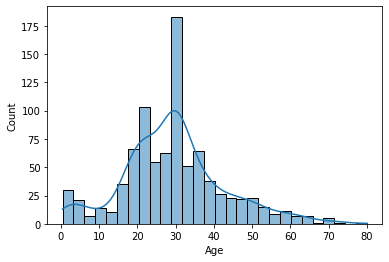

In [12]:
print("Describe",df_idade_imputada['Age'].describe())
print("Kurtose",df_idade_imputada['Age'].kurt())
print("Skewness",df_idade_imputada['Age'].skew())
sns.histplot(df_idade_imputada,x='Age',kde=True)

Vamos analisar a distribuição de sobreviventes em relação a idade dos tripulantes.

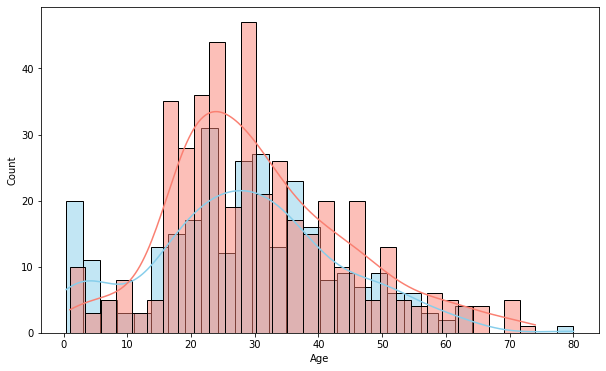

In [13]:
sobreviventes = df[df['Survived'] == 1]
nao_sobreviventes = df[df['Survived'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(sobreviventes['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Sobreviventes', kde=True)
sns.histplot(nao_sobreviventes['Age'].dropna(), bins=30, color='salmon', edgecolor='black', alpha=0.5, label='Não Sobreviventes', kde=True)
plt.show()
plt.show()

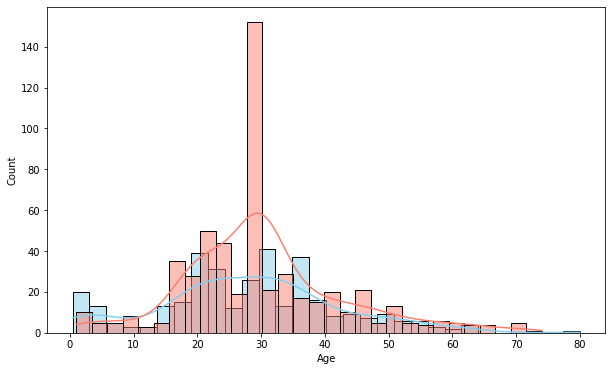

In [14]:
sobreviventes = df_idade_imputada[df_idade_imputada['Survived'] == 1]
nao_sobreviventes = df_idade_imputada[df_idade_imputada['Survived'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(sobreviventes['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Sobreviventes', kde=True)
sns.histplot(nao_sobreviventes['Age'].dropna(), bins=30, color='salmon', edgecolor='black', alpha=0.5, label='Não Sobreviventes', kde=True)
plt.show()

A imputação alterou levemente a distribuição de __sobreviventes__, mantendo também a assimetria a direita, como observado anteriormente.

Após a imputação percebemos o aumento dos __não-sobreviventes__, aumentando a frequência da faixa etaria de 30 anos.

# Formulando hipoteses e visualizando dados

Podemos formular algumas hipoteses acerca dessa base de dados, como por exemplo:

**1\. Existe correlação entre o sexo do tripulante e sua sobrevivência?**  
**2\. Existe alguma relação entre a classe economica e a taxa de sobrevivência?**  
**3\. A idade dos passageiros influência a sobrevivência ao acidente?**  

Para as perguntar acima, os atributos de maior importância são: **Sex**,**Age**, **Cabin** e **Fare**.

Vamos verificar a distribuição de sobreviventes no total.

<Axes: xlabel='Survived', ylabel='Percent'>

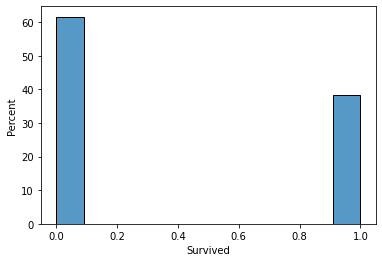

In [15]:
sns.histplot(df , x = 'Survived' , stat = 'percent')

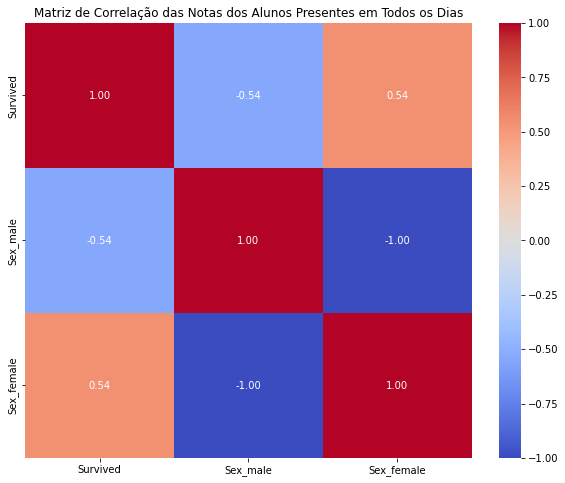

In [16]:
df_sex_encoded = df.copy()

df_sex_encoded = pd.get_dummies(df_sex_encoded, columns=['Sex'])


cor = df_sex_encoded[['Survived','Sex_male','Sex_female']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=cor, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação das Notas dos Alunos Presentes em Todos os Dias')
plt.show()

Podemos osbervar uma boa correlação significativa entre sexo e sobrevivência.
Vamos verificar a distribuição de sobreviventes por sexo.

Primeiramente vamos investigar a distribuição de tripulantes por sexo durante o ocorrido.

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

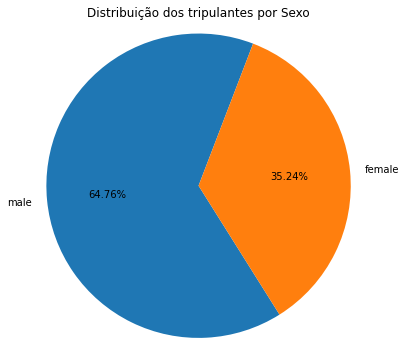

In [17]:
display(df['Sex'].describe())

plt.figure(figsize=(6, 6))
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.2f%%', startangle=69)
plt.title('Distribuição dos tripulantes por Sexo')
plt.axis('equal')
plt.show()

Verifica-se uma relação de aproximadamente 2 para 1, com uma tripulação total composta por homens em sua maioria, possivelmente contabilizando funcionarios.  
Podemos então verificar a proporção de sobreviventes agrupados por sexo para fins de comparação.

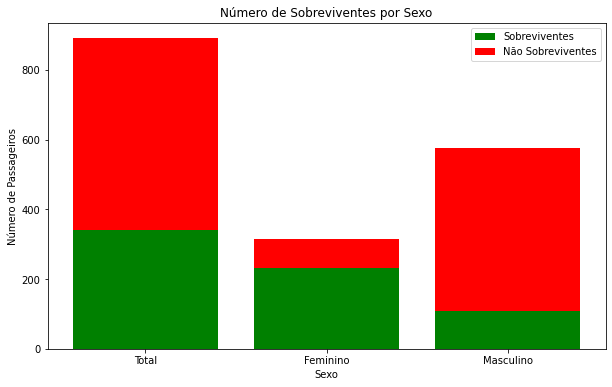

In [18]:
# percebo agora que alguns nomes de variaveis não foram muito bem pensados...
sobreviventes_por_sexo = [df['Survived'].sum(), df_f['Survived'].sum(), df_m['Survived'].sum()]
nao_sobreviventes_por_sexo = [len(df) - df['Survived'].sum(), len(df_f) - df_f['Survived'].sum(), len(df_m) - df_m['Survived'].sum()]

plt.figure(figsize=(10, 6))
plt.bar(['Total', 'Feminino', 'Masculino'], sobreviventes_por_sexo, color='green', label='Sobreviventes')
plt.bar(['Total', 'Feminino', 'Masculino'], nao_sobreviventes_por_sexo, color='red', bottom=sobreviventes_por_sexo, label='Não Sobreviventes')
plt.xlabel('Sexo')
plt.ylabel('Número de Passageiros')
plt.title('Número de Sobreviventes por Sexo')
plt.legend()
plt.show()

In [19]:
print(f"A taxa de sobreviventes total foi de {df['Survived'].sum()/len(df)*100}")
print(f"A taxa de mulheres sobreviventes foi de {df_f['Survived'].sum()/len(df_f)*100}")
print(f"A taxa de homens sobreviventes foi de {df_m['Survived'].sum()/len(df_m)*100}")

A taxa de sobreviventes total foi de 38.38383838383838
A taxa de mulheres sobreviventes foi de 74.20382165605095
A taxa de homens sobreviventes foi de 18.890814558058924


---

Vamos repetir a análise para os atributos __Pclass__, que indica a classe do bilhete/viagem (1ª classe, 2ª classe ou classe ecônomica).

Describe count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Kurtose -1.2800149715782825
Skewness -0.6305479068752845


<Axes: xlabel='Pclass', ylabel='Count'>

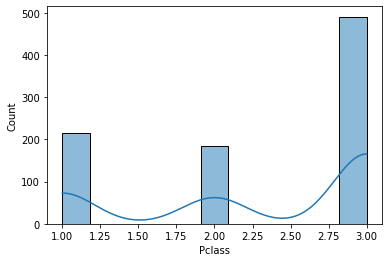

In [21]:
print("Describe",df['Pclass'].describe())
print("Kurtose",df['Pclass'].kurt())
print("Skewness",df['Pclass'].skew())
sns.histplot(df,x='Pclass',kde=True)

A classe 3/ecônomica compunha a maior população dos tripulantes, sendo maior que as outras duas somadas. A __kurtose__ indica maior dispersão do que a concentração padrão, com cauda mais leve, e __skewness__ indica assimetria negativa, com cauda estendida à esquerda, indicando maior concentração na classe 3.

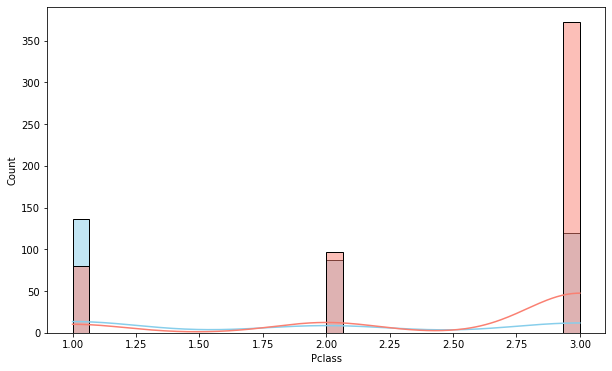

In [22]:
sobreviventes = df[df['Survived'] == 1]
nao_sobreviventes = df[df['Survived'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(sobreviventes['Pclass'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Sobreviventes', kde=True)
sns.histplot(nao_sobreviventes['Pclass'].dropna(), bins=30, color='salmon', edgecolor='black', alpha=0.5, label='Não Sobreviventes', kde=True)
plt.show()
plt.show()

**1\. Existe correlação entre o sexo do tripulante e sua sobrevivência?**
    - A taxa de sobrevivência das mulheres foi significativamente maior que a dos homens, apresentando uma boa correlação entre sexo e sobrevivência. No entanto é valido mencionar que a população masculina durante a viagem era 2 vezes maior que a feminina, explicando o acumulo de homens não-sobreviventes.  

**2\. Existe alguma relação entre a classe economica e a taxa de sobrevivência?**  
    - Embora exista uma leve correlação entre classe e sobrevivência, o que indicaria que tripulantes da primeira classe receberam prioridade nos socorros, é importante mencionar que a população da classe 3 é maior que as outras classes somadas.

**3\. A idade dos passageiros influência a sobrevivência ao acidente?**
    - Embora a comparação entre sobreviventes da faixa etaria de 0 a 10 anos seja maior que a quantidade de não-sobreviventes da mesma idade, a correlação de entre idade e sobrevivência é relativamente baixa. Também é importante mencionar que a imputação dos dados pode causar enviesamento na análise, uma